In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Section 1: K-Means

### 1. K-Means Function

In [3]:
def k_means(data, k, max_iteration=100):
    
    # getting the dimensions of the data
    m = data.shape[0]
    n = data.shape[1]
    
    # an array to store the closest centroid to each data point
    c = np.zeros(m, dtype='int')
    
    # choosing `k` random samples from the data as initial centroids
    centroids = data[np.random.choice(m, k)]
    
    # the main loop
    for _ in range(max_iteration):
        
        # finding the closest centroid to each data point
        for i in range(m):
            c[i] = np.argmin(np.sum(
                (np.repeat([data[i, :]], k, axis=0) - centroids) ** 2, axis=1
            ))
        
        # updating centroids
        for i in range(k):
            centroids[i, :] = np.average(data[np.where(c == i)[0]], axis=0)
    
    return c, centroids

### 2. Mean Distance Function

In [4]:
def mean_distance(data, c, centroids):
    return np.average(np.sqrt(np.sum((data - centroids[c]) ** 2, axis=1)))

### 3. Testing K-Means on Iris Dataset

In [5]:
iris_df = pd.read_csv('datasets/data1.csv')
iris_data = np.array(iris_df.iloc[:, :-1])

In [6]:
ks = [1, 2, 3, 4, 5]
mean_distances = []

for k in ks:
    c, centroids = k_means(iris_data, k)
    mean_distances.append(mean_distance(iris_data, c, centroids))

### 4. Plotting Mean Distance for Different Ks

Text(0, 0.5, 'Cost')

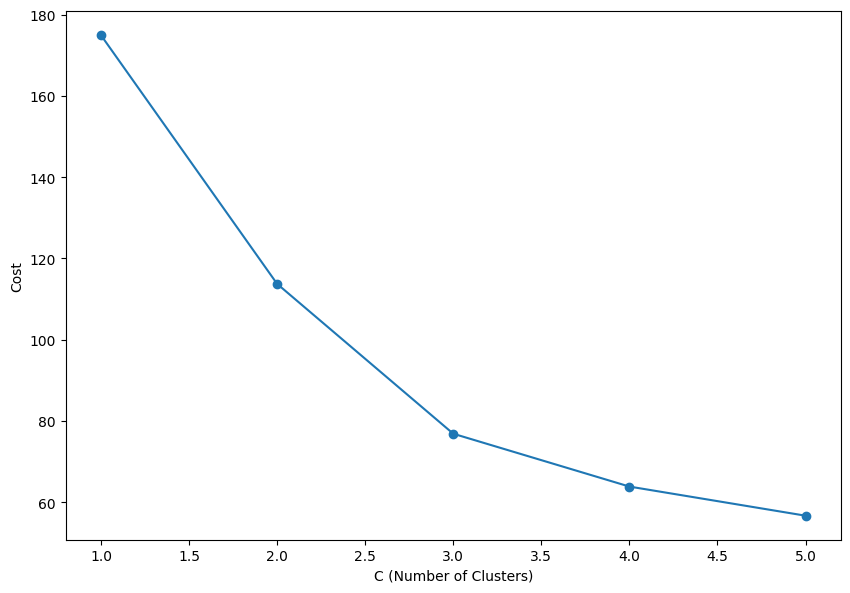

In [7]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 100
plt.plot(range(1, len(ks) + 1), mean_distances)
plt.scatter(range(1, len(ks) + 1), mean_distances)
plt.xlabel('C (Number of Clusters)')
plt.ylabel('Cost')

#### Using the Elbow method, k = 3 is the best choice for the number of clusters.

# Section 2: ‫‪DBSCAN‬‬

### 5. Plotting Worms Dataset

In [20]:
worms_df = pd.read_csv('datasets/worms.csv')
worms_data = np.array(worms_df.iloc[:, 1:])

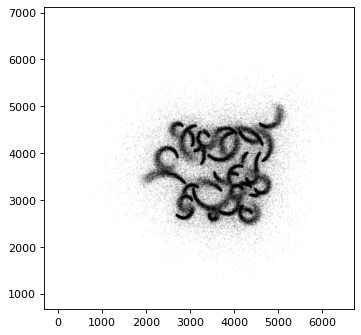

In [21]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 80
plt.scatter(worms_data[:, 0], worms_data[:, 1], color='black', s=0.0004)

### 6. Testing K-Means on This Dataset

In [8]:
def plot_clusters(data, num_clusters, c):
    for i in range(num_clusters):
        cluster = data[np.where(c == i)[0]]
        plt.scatter(cluster[:, 0], cluster[:, 1], s=0.0004)

In [10]:
k = 10
c, _ = k_means(worms_data, k)

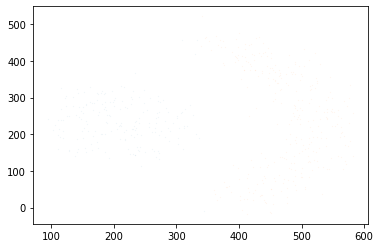

In [12]:
plot_clusters(worms_data, k, c)

### 7. Testing DBSCAN on This Dataset

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
db = DBSCAN(eps=40, min_samples=180).fit(worms_data)
labels = db.labels_
num_clusters = len(set(labels))
print("Number of Clusters (Worms) =", num_clusters)

Number of Clusters (Worms) = 26


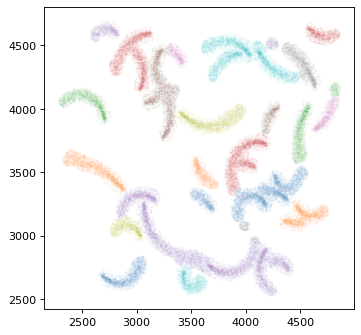

In [27]:
plot_clusters(worms_data, num_clusters, labels)